<a href="https://colab.research.google.com/github/Spili11/DS_Praktikum/blob/main/NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [5]:
tokenizer = Tokenizer()
path = '/content/drive/MyDrive/Colab Notebooks/AB.txt'
file = open(path, "r")
data = file.read()


In [12]:
data = data.replace('\n', "").replace('. ', '.')
corpus = data.lower().split('.')

In [32]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [34]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i + 1]
    input_sequences.append(n_gram_sequence)

In [36]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

In [38]:
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [41]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
15/15 [==============================] - 0s 13ms/step - loss: 5.5843 - accuracy: 0.0352
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 5.3022 - accuracy: 0.0529
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 4.8869 - accuracy: 0.0705
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 4.3436 - accuracy: 0.0815
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 3.5225 - accuracy: 0.1872
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 2.5787 - accuracy: 0.3458
Epoch 7/100
15/15 [==============================] - 0s 12ms/step - loss: 1.7492 - accuracy: 0.5396
Epoch 8/100
15/15 [==============================] - 0s 11ms/step - loss: 1.0774 - accuracy: 0.7489
Epoch 9/100
15/15 [==============================] - 0s 11ms/step - loss: 0.8288 - accuracy: 0.7952
Epoch 10/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6386 - accuracy: 0.8480

In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

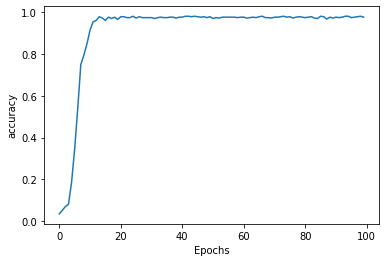

In [43]:
plot_graphs(history, 'accuracy')

In [45]:
seed_text = "Nemocnice a lekáři"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Nemocnice a lekáři to bylo 353 předevčírem stejný počet počet nárůst hospitalizovaných pacientů v nemocnicích nemocnicích de facto tuhle možnost vyloučil protože jsem si neuměl představit že se to může stát stát oborů které de facto od zítra nebudou moci podnikat nebudou moci podnikat se to bylo to hlavní kritérium proto jsme se tak rozhodli tak je potřeba vědět že to jsou lůžka pro všechny nejenom pro covidové pacienty pacienty pacienty pacienty pacienty pacienty podnikat podnikat podnikat podnikat podnikat podnikat může zítra nebudou moci podnikat podnikat podnikat podnikat to může stát nárůsty v evropě a to je ten hlavní problém jsme udělali to
